In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
df = pd.read_csv('/content/payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


## Understand Data

### Seach for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [5]:
df.isnull().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,95
isWeekend,560
label,0


In [8]:
print('## Payment Methods ##')
display(df['paymentMethod'].value_counts())

print('## Categorys ##')
display(df['Category'].value_counts())


## Payment Methods ##


,count
paymentMethod,
creditcard,28004
paypal,9303
storecredit,1914


## Categorys ##


,count
Category,
shopping,13328
food,12964
electronics,12834


## Solved null problems

SimpleImputer is a tool from the scikit-learn library in Python. Its main job is to fill in missing values in a dataset. Missing values are often represented as NaN (Not a Number). When you're working with data, especially in a Colab notebook, you often find that some cells are empty or have missing information. Machine learning models can't work with this missing data, so you need to fill it in. That's what SimpleImputer does.

You can use different strategies to fill the missing values. The most common ones are:

- 'mean': This replaces missing values with the average of the non-missing values in that column.

- 'median': This replaces missing values with the middle value of the non-missing values. This is useful if your data has outliers.

- 'most_frequent': This replaces missing values with the value that appears most often. This is a good choice for categorical data.

In [9]:
imputer = SimpleImputer(strategy='median')
df['isWeekend'] = imputer.fit_transform(df[['isWeekend']])

In [10]:
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])

In [11]:
df.isnull().sum()

,0
accountAgeDays,0
numItems,0
localTime,0
paymentMethod,0
paymentMethodAgeDays,0
Category,0
isWeekend,0
label,0


Machine learning models require numerical input. Our dataset contains categorical features (text-based data) that must be converted into numerical format.

We'll use Label Encoding for this purpose. A LabelEncoder assigns a unique integer to each unique category in a column.

For example, it might convert **['Cash', 'Credit Card', 'Bank Transfer']** to **[0, 1, 2]**.

In [12]:
le = LabelEncoder()
cols_to_encode = ['paymentMethod', 'Category']

for i in cols_to_encode:
    df[i] = le.fit_transform(df[i])

## See the correlation Matrix

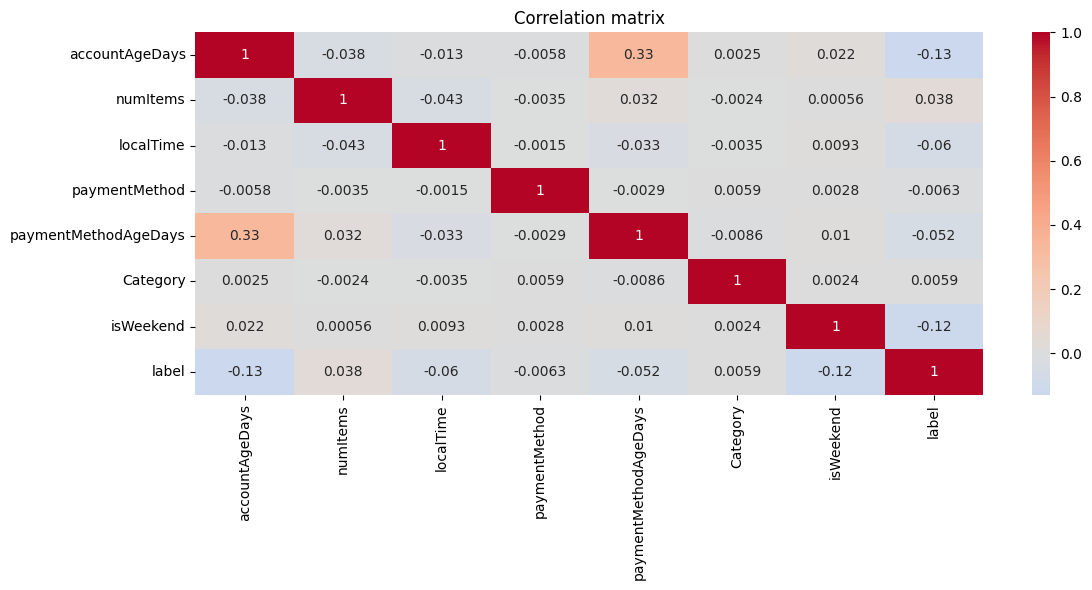

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,
           annot=True,
           center=0,
           cmap='coolwarm')
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

## Train the model

In [15]:
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5,
                          weights='uniform',
                          metric='manhattan')

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

In [24]:
knn_predictions = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"Accuracy of tree : ", knn_accuracy)


print("Classification Report of knn \n", classification_report(y_test, knn_predictions))
print("Confusion Matrix of knn \n", confusion_matrix(y_test, knn_predictions))

Accuracy of tree :  0.9782026768642448
Classification Report of knn 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7733
           1       0.35      0.62      0.45       112

    accuracy                           0.98      7845
   macro avg       0.67      0.80      0.72      7845
weighted avg       0.99      0.98      0.98      7845

Confusion Matrix of knn 
 [[7604  129]
 [  42   70]]
